## Tutorial Solution: Neural Networks

You have been employed as a data scientist by the Bureau of Meteorology to build a model to predict the intensity of bushfires in Australia using the Fire Radiative Power (FRP) technique. 

You will be using the **Fires from Space: Australia
NASA Satellite Data MODISC6 and VIIRS 375m from 2019-08-01 to 2020-01-11** dataset, available on Kaggle: https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland?select=fire_archive_M6_96619.csv

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

def one_hot_encode(dataframe, col_name):
    dataframe = pd.get_dummies(dataframe, columns=[col_name], prefix = [col_name])
    return dataframe

In [2]:
#load the dataset
data = pd.read_csv("./datasets/fires.csv")

In [3]:
#check out its features
data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [4]:
#one hot encode the daynight feature
subset = one_hot_encode(data, 'daynight')
subset.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,type,daynight_D,daynight_N
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,0,1,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,0,1,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,0,1,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,0,1,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,0,1,0


In [5]:
#select the following as your chosen_features: 'latitude','longitude','brightness','confidence','bright_t31','frp','daynight_D'
chosen_features = subset.filter(['latitude','longitude','brightness','confidence','bright_t31','frp','daynight_D'])
chosen_features.head()

,latitude,longitude,brightness,confidence,bright_t31,frp,daynight_D
0,-11.8070,142.0583,313.0,48,297.3,6.6,1
1,-11.7924,142.0850,319.3,71,297.3,11.3,1
2,-12.8398,132.8744,311.6,42,298.7,23.1,1
3,-14.4306,143.3035,310.1,33,296.1,6.5,1
4,-12.4953,131.4897,310.3,36,298.8,27.6,1


In [6]:
#always remember to check for NaN values
check_NaN(chosen_features)

Total NaN: 0
NaN by column:
 latitude      0
longitude     0
brightness    0
confidence    0
bright_t31    0
frp           0
daynight_D    0
dtype: int64


In [7]:
#Create the train/test splits 
x_train, x_test, y_train, y_test = train_test_split(chosen_features.drop(['frp'], axis=1),chosen_features['frp'],test_size=0.1)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (32409, 6) (3602, 6)
y train/test  (32409,) (3602,)


In [8]:
#Convert them from pandas to numpy arrays
x = x_train.values
y = y_train.values
x_t = x_test.values
y_t = y_test.values

In [9]:
#create then train an MLP Regressor model
MLP = MLPRegressor()
MLP.fit(x, y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [10]:
#Run your model on the test set, then calculate the mean squared error and co-efficient of determination
predictions = MLP.predict(x_t)
print("Mean squared error: ",np.mean((predictions - y_t) ** 2))
print("Co-efficient of determination: ",metrics.r2_score(y_t, predictions))

Mean squared error:  4013.8250384359026
Co-efficient of determination:  0.5560276400482107


Use matplotlib to draw a scatterplot comparing the real v predicted datapoints as seen in the "Multi-Layered Perceptron: The Regression MLP" lecture
 


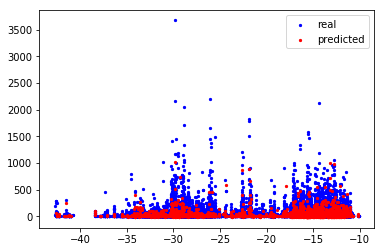

In [11]:
#scatterplot
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x[:,0],y, s=5, c='b', label='real')
ax1.scatter(x_t[:,0],predictions, s=5, c='r', marker="o", label='predicted')
plt.legend()
plt.show()

In [12]:
#see what your model does when you pass in a test fire
test_fire = [-12.6826,143.1027,334.6,84,305.7,1]
#pass in the test_fire
prediction = MLP.predict([test_fire])
print("The predicted FRP value of a fire with the following values ",test_fire," is ",round(prediction[0],2))

The predicted FRP value of a fire with the following values  [-12.6826, 143.1027, 334.6, 84, 305.7, 1]  is  40.34


#### MLP Classifier
Your supervisor has given you news that the BOM has come to a conclusion that all fires with FRP scores equalt to or above 100 are to be considered as threatening, with those with an FRP score below 100 being considered non-threatening. You are to create a classification model that predicts whether a given fire will be threatening or non-threatening.

In [13]:
#import the MLPClassifier
from sklearn.neural_network import MLPClassifier

In [14]:
#Replace all frp values in your chosen_features pandaframe with 0 or 1 based on the above threshold
chosen_features.loc[chosen_features['frp'] < 100, 'frp'] = 0
chosen_features.loc[chosen_features['frp'] >= 100, 'frp'] = 1

In [15]:
#preview your chosen_features
chosen_features.head()

,latitude,longitude,brightness,confidence,bright_t31,frp,daynight_D
0,-11.8070,142.0583,313.0,48,297.3,0.0,1
1,-11.7924,142.0850,319.3,71,297.3,0.0,1
2,-12.8398,132.8744,311.6,42,298.7,0.0,1
3,-14.4306,143.3035,310.1,33,296.1,0.0,1
4,-12.4953,131.4897,310.3,36,298.8,0.0,1


In [16]:
#Create the train/test splits
x_train, x_test, y_train, y_test = train_test_split(chosen_features.drop(['frp'], axis=1),chosen_features['frp'],test_size=0.1)                                                                       
print("x train/test ",x_train.shape, x_test.shape)
print("y train/test ",y_train.shape, y_test.shape)

x train/test  (32409, 6) (3602, 6)
y train/test  (32409,) (3602,)


In [17]:
#Convert them from pandas to numpy arrays
x = x_train.values
y = y_train.values
x_t = x_test.values
y_t = y_test.values

In [18]:
#create then train an MLP Classifier model
MLP = MLPClassifier() 
MLP.fit(x, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
#Run your model on the test set, then calculate the mean squared error and accuracy
predictions = MLP.predict(x_t)
print("Mean squared error: ",np.mean((predictions - y_t) ** 2))
print("Accuracy:",str(round(metrics.accuracy_score(y_t, predictions)*100))+"%")

Mean squared error:  0.06468628539700166
Accuracy: 94.0%


Modify the code below by using an if statement and the threatening/non-threatening threshold to print the following message: "A fire at latitide/longitude[ -12.6826 , 143.1027 ] with brightness 334.6 is classified as: Non-threatening"

In [20]:
test_fire = [-12.6826,143.1027,334.6,84,305.7,1]
prediction = MLP.predict([test_fire])
output=''
if prediction==0:
    output='Non-threatening'
else:
    output='Threatening'
print("A fire at latitide/longitude[",test_fire[0],",", test_fire[1],"] with brightness",test_fire[2],"is classified as:",output)

A fire at latitide/longitude[ -12.6826 , 143.1027 ] with brightness 334.6 is classified as: Non-threatening


As a very curious data scientist, you can't help wondering how well a single perceptron model would work in this situation...

In [21]:
#Create a perception model and train it
perceptron = Perceptron()
perceptron.fit(x, y)

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
#Run your model on the test set, then calculate the mean squared error and accuracy
predictions = perceptron.predict(x_t)
print("Mean squared error: ",np.mean((predictions - y_t) ** 2))
print("Accuracy:",str(round(metrics.accuracy_score(y_t, predictions)*100))+"%")

Mean squared error:  0.13492504164353136
Accuracy: 87.0%


How did it go? Is the MLPClassifier or Perceptron more suitable for this application?